# AP1
## Ali Afsharian

In [1]:
from pandas import read_csv
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Importing the data for turbineID1
data1 = read_csv('https://odysseus.informatik.uni-oldenburg.de/download/Data/NREL/2006/1.csv', header=0, index_col=0, parse_dates=True)
data1.head()

,100m wind speed (m/s),rated power output at 100m (MW),SCORE-lite power output at 100m (MW),CorrectedScore
Date(YYYY-MM-DD hh:mm:ss),,,,
2006-01-01 00:00:00,5.12,1.788,2.012,2.012
2006-01-01 00:10:00,5.12,1.788,2.227,2.227
2006-01-01 00:20:00,5.14,1.812,0.130,0.130
2006-01-01 00:30:00,5.17,1.848,2.311,2.311
2006-01-01 00:40:00,5.24,1.929,1.849,1.849


In [366]:
print ('Number of samples:', len(data1))

Number of samples: 52560


Text(0.5, 0, 'Time')

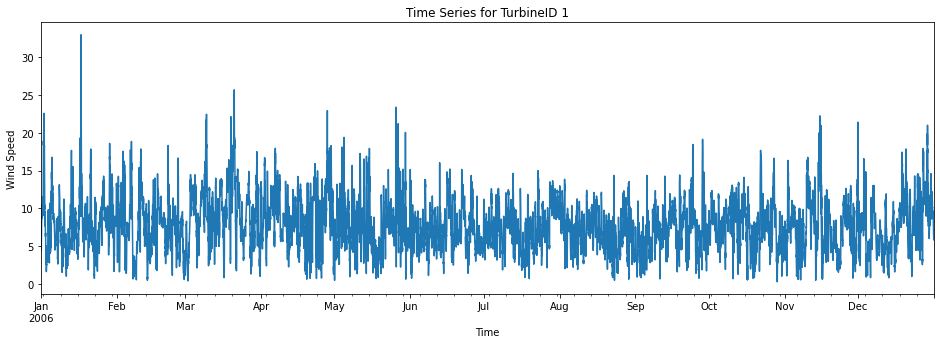

In [367]:
# Plotting the time series for turbineID1 - whole year
plt.figure(figsize=(16, 5))
data1["100m wind speed (m/s)"].plot()
plt.title('Time Series for TurbineID 1')
plt.ylabel('Wind Speed')
plt.xlabel('Time')

Text(0.5, 0, 'Time')

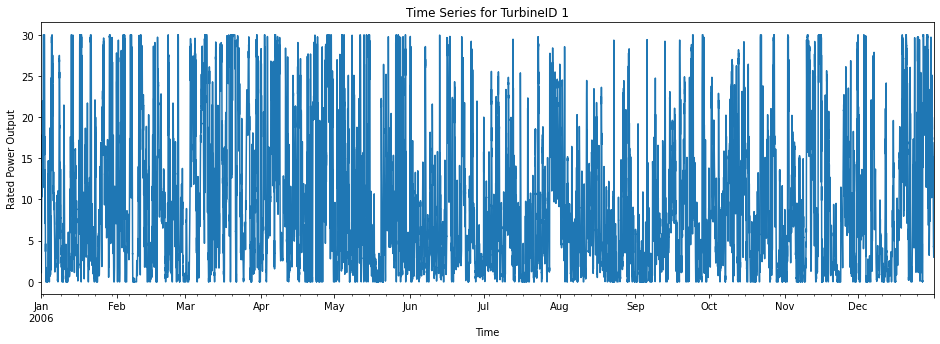

In [368]:
plt.figure(figsize=(16, 5))
data1[" rated power output at 100m (MW)"].plot()
plt.title('Time Series for TurbineID 1')
plt.ylabel('Rated Power Output')
plt.xlabel('Time')

In [369]:
# extracting the data for January
data1_Jan = data1['2006-01-01':'2006-01-31']

In [370]:
data1_Jan.tail()

,100m wind speed (m/s),rated power output at 100m (MW),SCORE-lite power output at 100m (MW),CorrectedScore
Date(YYYY-MM-DD hh:mm:ss),,,,
2006-01-31 23:10:00,12.20,24.315,26.878,26.878
2006-01-31 23:20:00,11.95,23.391,22.563,22.563
2006-01-31 23:30:00,11.17,20.325,20.754,20.754
2006-01-31 23:40:00,10.82,18.861,18.891,18.891
2006-01-31 23:50:00,10.71,18.390,20.031,20.031


Text(0.5, 0, 'Date')

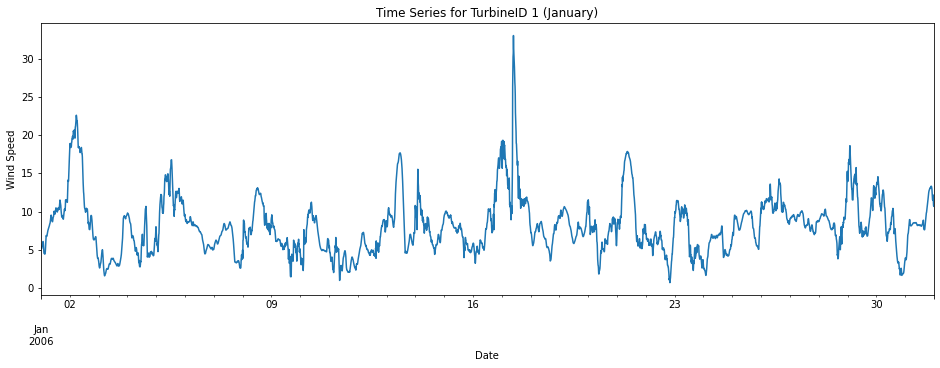

In [371]:
# Plotting the wind speed time series for turbineID1
plt.figure(figsize=(16, 5))
data1_Jan["100m wind speed (m/s)"].plot()
plt.title('Time Series for TurbineID 1 (January)')
plt.ylabel('Wind Speed')
plt.xlabel('Date')

Text(0.5, 0, 'Date')

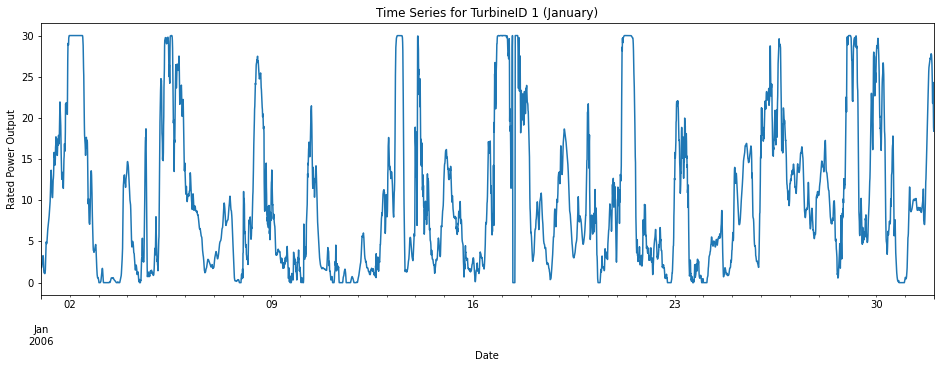

In [372]:
# Plotting the output power for turbine 1
plt.figure(figsize=(16, 5))
data1_Jan[" rated power output at 100m (MW)"].plot()
plt.title('Time Series for TurbineID 1 (January)')
plt.ylabel('Rated Power Output')
plt.xlabel('Date')

In [373]:
# Extracting hour, day and wind speed data for turbineID1 in January
hour = data1_Jan.index.hour
day = data1_Jan.index.day
windspeed = data1_Jan['100m wind speed (m/s)']

In [374]:
d = {'hour':hour, 'day':day, 'windspeed':windspeed}
df = pd.DataFrame (data=d)

Text(0.5, 1.0, 'Heat Map for TurbineID1 (January)')

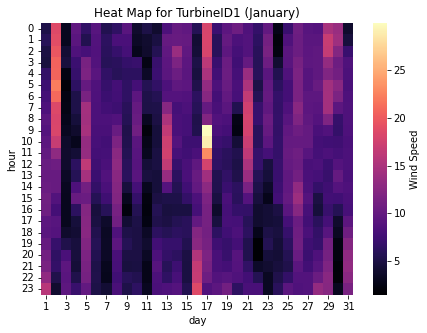

In [375]:
# Plotting heatmap for turbineID1
import seaborn as sns
plt.figure(figsize=(7, 5))
hm1 = df.pivot_table(index="hour",columns="day",values="windspeed", aggfunc="mean")
sns.heatmap(hm1, annot=False, cmap="magma", cbar_kws={'label': 'Wind Speed'})
plt.title('Heat Map for TurbineID1 (January)')

Text(0.5, 0.97, 'Hourly Wind Speed (January) - Turbine 1')

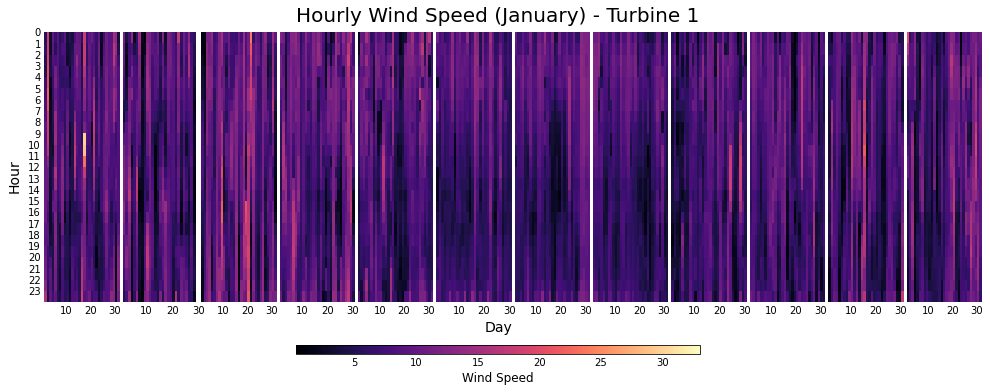

In [376]:
MIN_WS = data1['100m wind speed (m/s)'].min()
MAX_WS = data1['100m wind speed (m/s)'].max()

# Plotting heatmap for whole year 2006 for turbine 1

import matplotlib.colors as mc # For the legend

def single_plot (data, month, ax):
    data = data[data.index.month == month]
    hour = data.index.hour
    day = data.index.day
    WindSpeed = data['100m wind speed (m/s)']
    #WindSpeed = WindSpeed.values.reshape(24, len(day.unique()), order="F")
    d = {'hour':hour, 'day':day, 'windspeed':WindSpeed}
    df = pd.DataFrame (data=d)
    WindSpeed = df.pivot_table(index="hour",columns="day",values="windspeed", aggfunc="mean")

    xgrid = np.arange(day.max() + 1) + 1
    ygrid = np.arange(25)
    
    ax.pcolormesh(xgrid, ygrid, WindSpeed, cmap="magma", vmin=MIN_WS, vmax=MAX_WS)
    # Invert the vertical axis
    ax.set_ylim(24, 0)
    # Set tick positions for both axes
    ax.yaxis.set_ticks([i for i in range(24)])
    ax.xaxis.set_ticks([10, 20, 30])
    # Remove ticks by setting their length to 0
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    
    # Remove all spines
    ax.set_frame_on(False)
    

fig, axes = plt.subplots(1, 12, figsize=(14, 5), sharey=True)

for i in range(1,13):
    single_plot(data1, i, axes[i-1])
    
fig.subplots_adjust(left=0.05, right=0.98, top=0.9, hspace=0.08, wspace=0.04)

# Another utility for the legend
from matplotlib.cm import ScalarMappable

# First, let's make some room for the legend in the bottom.
fig.subplots_adjust(bottom=0.15)

# Create a new axis to contain the color bar
# Values are:
# (x coordinate of left border, 
#  y coordinate for bottom border,
#  width,
#  height)
cbar_ax = fig.add_axes([0.3, 0.005, 0.4, 0.025])

# Create a normalizer that goes from minimum to maximum wind speed
norm = mc.Normalize(MIN_WS, MAX_WS)

# Create the colorbar and set it to horizontal
cb = fig.colorbar(
    ScalarMappable(norm=norm, cmap="magma"), 
    cax=cbar_ax, # Pass the new axis
    orientation = "horizontal"
)

# Remove tick marks
cb.ax.xaxis.set_tick_params(size=0)

# Set legend label
cb.set_label("Wind Speed", size=12)
#fig

# Set common labels for x and y axes
fig.text(0.5, 0.08, "Day", ha="center", va="center", fontsize=14)
fig.text(0.02, 0.5, 'Hour', ha="center", va="center", rotation="vertical", fontsize=14)

fig.suptitle("Hourly Wind Speed (January) - Turbine 1", fontsize=20, y=0.97)
#fig

Kurtosis = 3.641


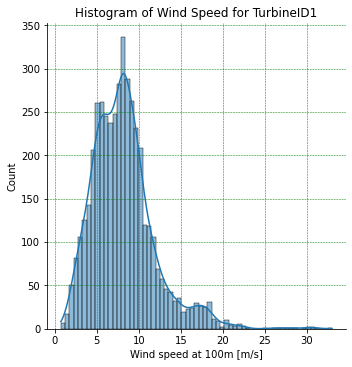

In [377]:
# Plotting the wind speed histogram for turbine 1 
#plt.hist(data1_Jan ["100m wind speed (m/s)"],bins = 40)
import seaborn as sns
sns.displot(data1_Jan ["100m wind speed (m/s)"], kde=True)#, bins = 40)
  
plt.title('Histogram of Wind Speed for TurbineID1')
plt.xlabel('Wind speed at 100m [m/s]')
plt.ylabel('Count')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

from scipy.stats import kurtosis
kur = kurtosis(data1_Jan ["100m wind speed (m/s)"])
print ('Kurtosis =', round(kur,3))

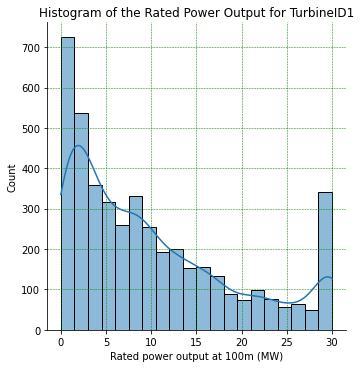

In [378]:
# Plotting the output power histogram for turbine 1
sns.displot(data1_Jan [" rated power output at 100m (MW)"],kde=True)#,bins = 40)
  
plt.title('Histogram of the Rated Power Output for TurbineID1')
plt.xlabel('Rated power output at 100m (MW)')
plt.ylabel('Count')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

In [379]:
# Distribution of wind speed for 1h increment

l = list()
for i in range (len(data1_Jan)-6):
    l.append (data1_Jan['100m wind speed (m/s)'][i]-data1_Jan['100m wind speed (m/s)'][i+6])

Standard Deviation = 1.45
Kurtosis = 7.78


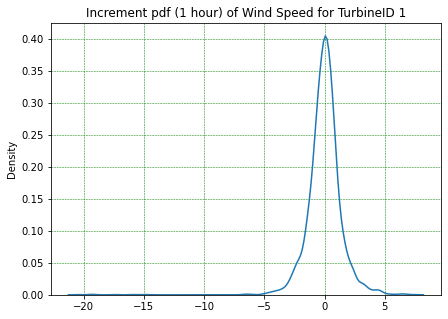

In [398]:
import seaborn as sns

plt.figure(figsize=(7, 5))
sns.kdeplot(l)
plt.title('Increment pdf (1 hour) of Wind Speed for TurbineID 1')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)


std = np.std(l)
kur = kurtosis(l)/(std**4)
print ('Standard Deviation =', round(std,3))
print ('Kurtosis =', round(kur,3))

In [390]:
import glob

# Import data for all 10 turbines
path = r'E:/Data-Engineering-Jacbos/Semester 2/Advanced Project/AP1/Data'
all_files = glob.glob(path + "/*.csv")

df_from_each_file = (pd.read_csv(f) for f in all_files)
data_all = pd.concat(df_from_each_file, ignore_index=True)

In [391]:
# Construct Dataframe for Wind Speed of all Turbines

k = len(data1)
WindSpeed_dic = {}
for i in range(10):
    WindSpeed_dic['TurbineID{}'.format(i+1)] = list(data_all['100m wind speed (m/s)'][i*k:(i+1)*k])

WindSpeed_df = pd.DataFrame(data=WindSpeed_dic)
#WindSpeed_df

In [392]:
# Construct Dataframe for Rated Power Output of all Turbines

k = len(data1)
PowerOut_dic = {}
for i in range(10):
    PowerOut_dic['TurbineID{}'.format(i+1)] = list(data_all[' rated power output at 100m (MW)'][i*k:(i+1)*k])

PowerOut_df = pd.DataFrame(data=PowerOut_dic)
#PowerOut_df

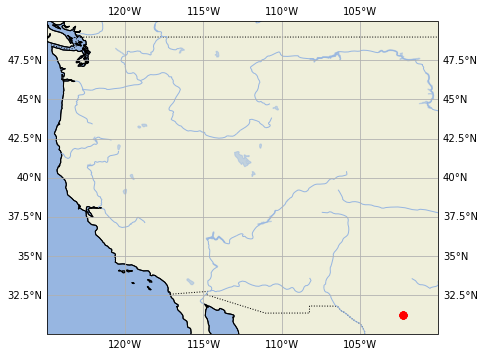

In [393]:
# Plotting the location of all Turbines

import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.figure(figsize=(7, 7))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-100, -125, 30, 50], ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.gridlines(draw_labels=True)

m_size = 7
plt.plot(-102.242, 31.192,  markersize=m_size, marker='o', color='red')
plt.plot(-102.225, 31.192,  markersize=m_size, marker='o', color='red')
plt.plot(-102.208, 31.192,  markersize=m_size, marker='o', color='red')
plt.plot(-102.258, 31.208,  markersize=m_size, marker='o', color='red')
plt.plot(-102.242, 31.208,  markersize=m_size, marker='o', color='red')
plt.plot(-102.225, 31.208,  markersize=m_size, marker='o', color='red')

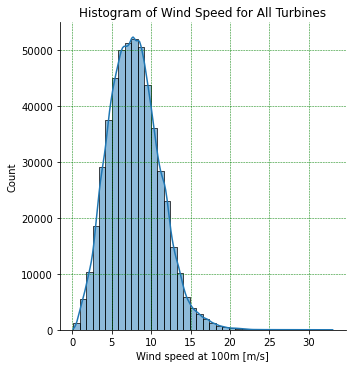

In [394]:
# Plotting histogram of wind speed for all turbines
sns.displot(data_all ["100m wind speed (m/s)"], kde=True, bins = 40)

plt.title('Histogram of Wind Speed for All Turbines')
plt.xlabel('Wind speed at 100m [m/s]')
plt.ylabel('Count')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

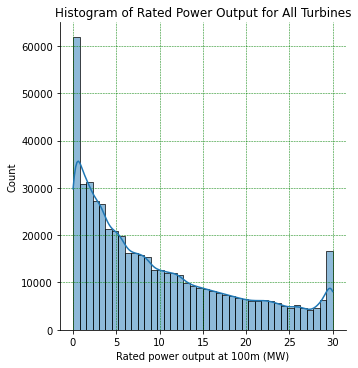

In [395]:
# Plotting histogram of output power for all turbines
sns.displot(data_all [" rated power output at 100m (MW)"], kde=True, bins = 40)
  
plt.title('Histogram of Rated Power Output for All Turbines')
plt.xlabel('Rated power output at 100m (MW)')
plt.ylabel('Count')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

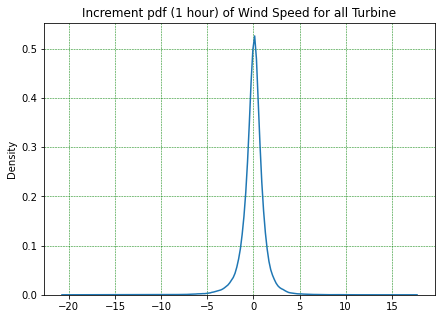

In [397]:
# Distribution of wind speed for 1h increment for all turbines
l_all = list()
for i in range(1,11):
    for j in range (len(WindSpeed_df)-6):
            l_all.append (WindSpeed_df['TurbineID{}'.format(i)][j]-WindSpeed_df['TurbineID{}'.format(i)][j+6])
            
# Plot 
plt.figure(figsize=(7, 5))
sns.kdeplot(l_all)
plt.title('Increment pdf (1 hour) of Wind Speed for all Turbine')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

Text(0.5, 0.98, 'Scatter Plot of Wind Speed for 10 Turbines')

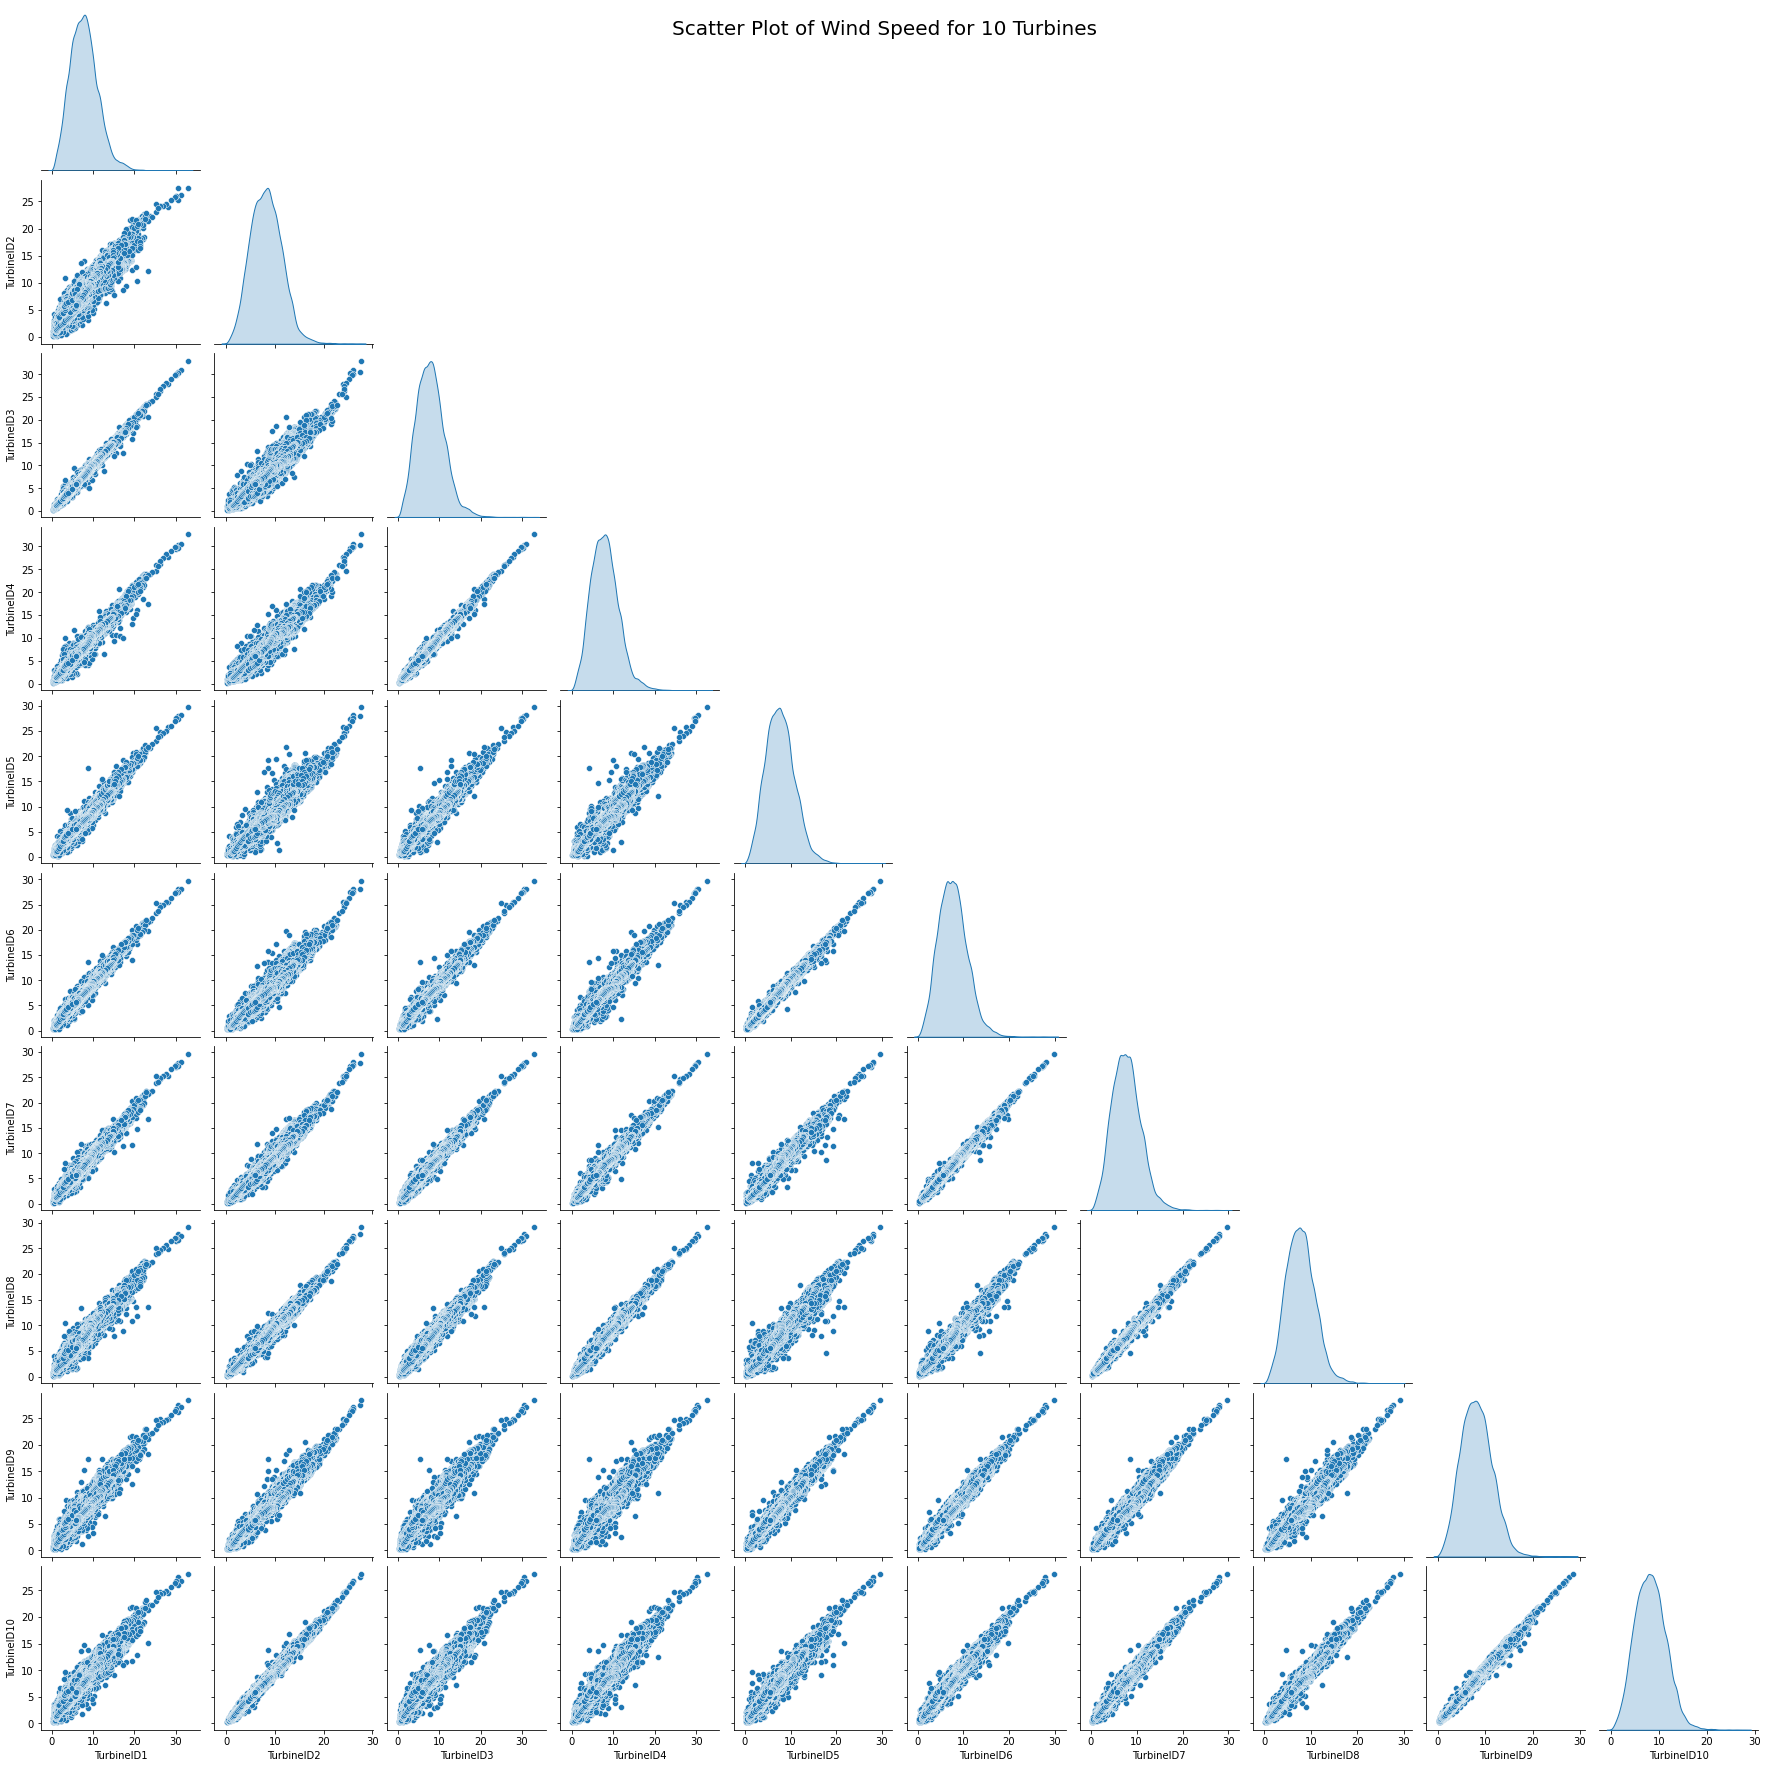

In [399]:
g = sns.pairplot(WindSpeed_df, diag_kind='kde', corner=True)
g.fig.suptitle('Scatter Plot of Wind Speed for 10 Turbines', fontsize = 20)

Text(0.5, 0.98, 'Scatter Plot of Rated Power Output for 10 Turbines')

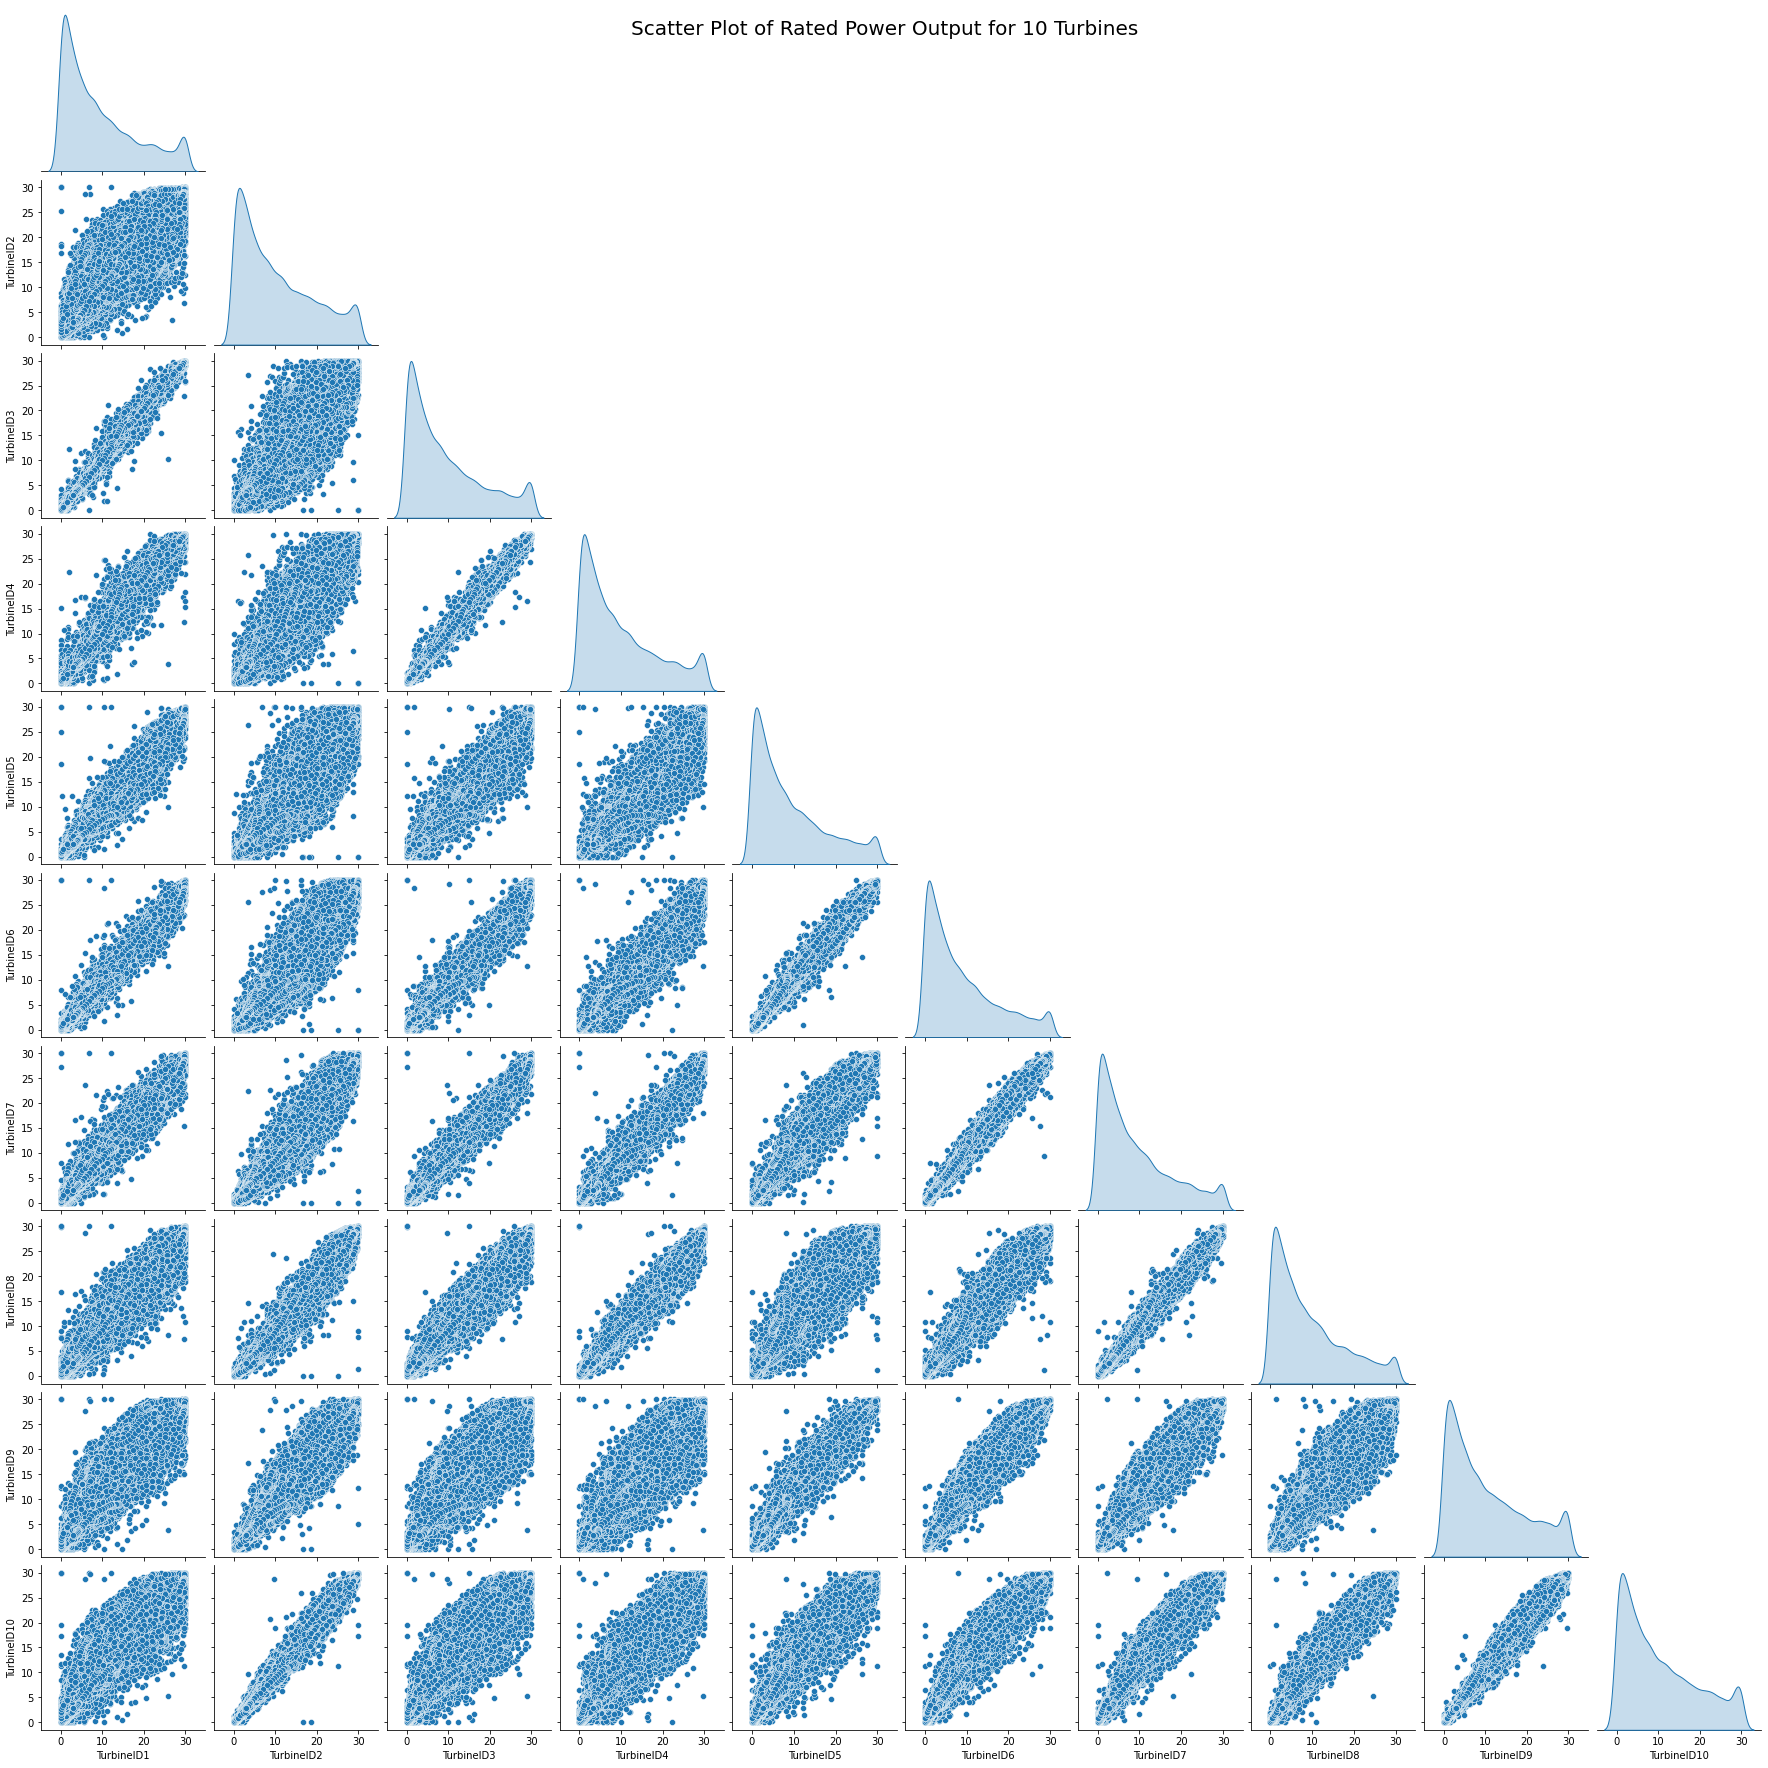

In [400]:
g = sns.pairplot(PowerOut_df, diag_kind='kde', corner=True)
g.fig.suptitle('Scatter Plot of Rated Power Output for 10 Turbines', fontsize = 20)

Text(0.5, 1.0, 'Correlation for Wind Speed')

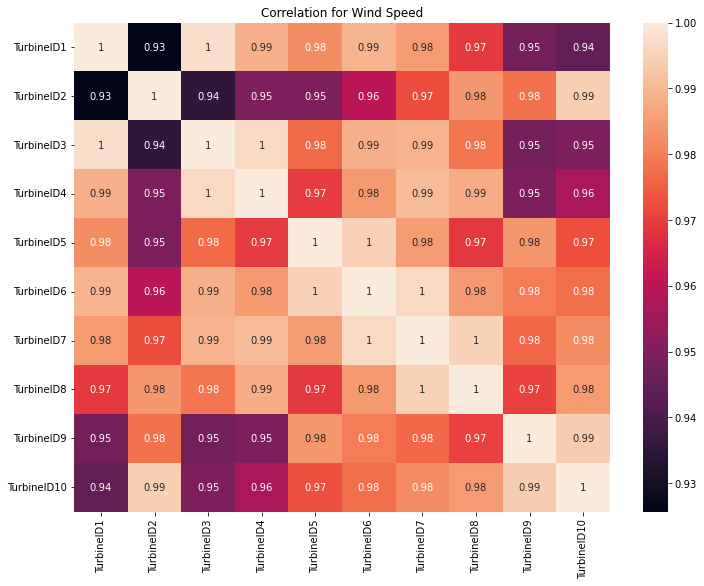

In [401]:
# Correlation matrix for Wind Speed
corrMatrix_WS = WindSpeed_df.corr()

# Plotting correlation matrix for wind speed
plt.figure(figsize=(12, 9))
sns.heatmap(corrMatrix_WS, annot=True)
plt.title('Correlation for Wind Speed')

Text(0.5, 1.0, 'Correlation for Rated Power Output')

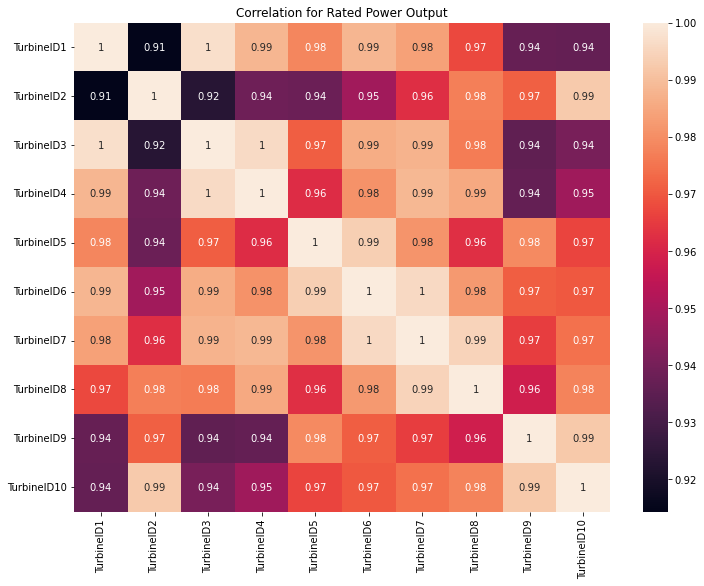

In [402]:
# Correlation matrix for rated output power
corrMatrix_PO = PowerOut_df.corr()

# Plotting correlation matrix for wind speed
plt.figure(figsize=(12, 9))
sns.heatmap(corrMatrix_PO, annot=True)
plt.title ('Correlation for Rated Power Output')

In [403]:
lat = [31.192,31.192,31.192,31.208,31.208,31.208,31.208,31.225,31.225,31.225]
lon = [-102.242,-102.225,-102.208,-102.258,-102.242,-102.225,-102.208,-102.242,-102.225,-102.208]

data_all_c = pd.DataFrame(columns=['time','wind speed','lat','lon'])
data_all_c['time'] = data_all['Date(YYYY-MM-DD hh:mm:ss)']
data_all_c['wind speed'] = data_all['100m wind speed (m/s)']
k = len(data1)
for i in range(10):
    data_all_c['lat'][i*k:(i+1)*k] = lat[i]
    data_all_c['lon'][i*k:(i+1)*k] = lon[i]
    
data_all_c['time'] =  pd.to_datetime(data_all_c['time'])
data_all_c

C:\Users\ALi\AppData\Local\Temp/ipykernel_14532/1251543176.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_all_c['lat'][i*k:(i+1)*k] = lat[i]
C:\Users\ALi\AppData\Local\Temp/ipykernel_14532/1251543176.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_all_c['lon'][i*k:(i+1)*k] = lon[i]


,time,wind speed,lat,lon
0,2006-01-01 00:00:00,5.12,31.192,-102.242
1,2006-01-01 00:10:00,5.12,31.192,-102.242
2,2006-01-01 00:20:00,5.14,31.192,-102.242
3,2006-01-01 00:30:00,5.17,31.192,-102.242
4,2006-01-01 00:40:00,5.24,31.192,-102.242
...,...,...,...,...
525595,2006-12-31 23:10:00,5.90,31.225,-102.208
525596,2006-12-31 23:20:00,5.82,31.225,-102.208
525597,2006-12-31 23:30:00,5.70,31.225,-102.208
525598,2006-12-31 23:40:00,5.73,31.225,-102.208


In [404]:
import pyEOF
df_data = pyEOF.get_time_space(data_all_c, time_dim = "time", lumped_space_dims = ["lat","lon"])
df_data

wind speed                                               \
lat                     31.192                     31.208                     
lon                   -102.242 -102.225 -102.208 -102.258 -102.242 -102.225   
time                                                                          
2006-01-01 00:00:00       5.12     5.83     5.29     5.47     4.69     5.03   
2006-01-01 00:10:00       5.12     5.93     5.30     5.48     4.75     5.10   
2006-01-01 00:20:00       5.14     6.04     5.33     5.53     4.84     5.17   
2006-01-01 00:30:00       5.17     6.14     5.37     5.58     4.92     5.25   
2006-01-01 00:40:00       5.24     6.29     5.43     5.66     5.03     5.36   
...                        ...      ...      ...      ...      ...      ...   
2006-12-31 23:10:00       6.24     5.92     6.33     6.42     5.84     5.89   
2006-12-31 23:20:00       6.14     5.86     6.25     6.37     5.70     5.77   
2006-12-31 23:30:00       5.95     5.73     6.07     6.20     5.54     5.61   
2006-12-31 23:40:00       5.86     5.74     5.95     6.07     5.53     5.56   
2006-12-31 23:50:00       5.85     5.84     5.90     5.98     5.58     5.59   

                                                         
lat                            31.225                    
lon                 -102.208 -102.242 -102.225 -102.208  
time                                                     
2006-01-01 00:00:00     5.31     5.51     5.17     5.59  
2006-01-01 00:10:00     5.38     5.57     5.28     5.70  
2006-01-01 00:20:00     5.45     5.65     5.41     5.81  
2006-01-01 00:30:00     5.53     5.73     5.53     5.93  
2006-01-01 00:40:00     5.63     5.83     5.69     6.08  
...                      ...      ...      ...      ...  
2006-12-31 23:10:00     5.95     5.99     5.84     5.90  
2006-12-31 23:20:00     5.85     5.92     5.72     5.82  
2006-12-31 23:30:00     5.68     5.76     5.63     5.70  
2006-12-31 23:40:00     5.61     5.67     5.68     5.73  
2006-12-31 23:50:00     5.63     5.66     5.80     5.85  

[52560 rows x 10 columns]

In [405]:
n = 4
pca = pyEOF.df_eof(df_data,pca_type="varimax",n_components=n)

eofs = pca.eofs(s=0, n=n) # get eofs
eofs_da = eofs.stack(["lat","lon"]).to_xarray() # make it convenient for visualization
pcs = pca.pcs(s=0, n=n) # get pcs
evfs = pca.evf(n=n) # get variance fraction

eofs

wind speed                                                              \
lat     31.192                        31.208                                 
lon   -102.242  -102.225  -102.208  -102.258  -102.242  -102.225  -102.208   
EOF                                                                          
1     0.364971  0.252685  0.367034  0.359513  0.308997  0.324207  0.325493   
2    -0.250125 -0.387666 -0.263051 -0.285644 -0.287417 -0.294944 -0.312940   
3     0.327198  0.236267  0.277838  0.226717  0.429097  0.357528  0.287744   
4     0.127741  0.134362 -0.088909 -0.333789  0.193216  0.544343  0.536329   

                                   
lat    31.225                      
lon  -102.242  -102.225  -102.208  
EOF                                
1    0.315092  0.256369  0.259691  
2   -0.338274 -0.346002 -0.366996  
3    0.219908  0.405123  0.318266  
4    0.335411 -0.334889  0.019175

In [406]:
evfs

array([0.45742692, 0.42816092, 0.11306615, 0.00065603])

In [407]:
pcs

,PC1,PC2,PC3,PC4
time,,,,
2006-01-01 00:00:00,-2.535153,2.542641,-2.553865,-0.888577
2006-01-01 00:10:00,-2.480914,2.478870,-2.493440,-0.861936
2006-01-01 00:20:00,-2.410635,2.400335,-2.417952,-0.836738
2006-01-01 00:30:00,-2.337834,2.320361,-2.340939,-0.807905
2006-01-01 00:40:00,-2.235522,2.209723,-2.233881,-0.770286
...,...,...,...,...
2006-12-31 23:10:00,-1.794153,1.875637,-1.825282,-0.650987
2006-12-31 23:20:00,-1.883593,1.964636,-1.919313,-0.692455
2006-12-31 23:30:00,-2.035826,2.110924,-2.064207,-0.758880


In [409]:
# Reconstructing data for wind speed based on eofs and pcs
reconstructed_data =  pd.DataFrame(np.dot(pcs,eofs))
mean = WindSpeed_df.mean()
for i in range(10):
    reconstructed_data[i] += mean[i]
                                   
#reconstructed_data

Text(0.5, 1.0, 'Wind Speed for TurbineID 1 (January)')

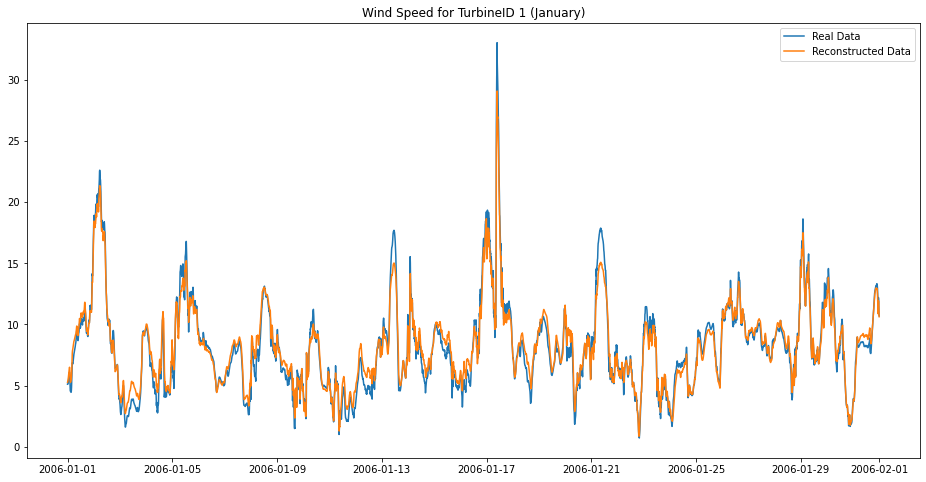

In [410]:
# Plotting reconstructed data for TurbineID 1 (January)

plt.figure(figsize=(16, 8))
plt.plot(data1_Jan.index, list(data1_Jan['100m wind speed (m/s)']))
plt.plot(data1_Jan.index, list(reconstructed_data[0][:len(data1_Jan)]))
plt.legend(['Real Data', 'Reconstructed Data'])
plt.title('Wind Speed for TurbineID 1 (January)')

In [411]:
from pyEOF import *
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# create a function for visualization convenience
def visualization(da, pcs, eofs_da, evf):
    fig = plt.figure(figsize = (15,18))

    ax = fig.add_subplot(n+1,2,1)
    da.mean(dim=["lat","lon"]).plot(ax=ax)
    ax.set_title("average wind speed")

    ax = fig.add_subplot(n+1,2,2)
    da.mean(dim="time").plot(ax=ax)
    ax.set_title("average wind speed")

    for i in range(1,n+1):
        pc_i = pcs["PC"+str(i)].to_xarray()
        eof_i = eofs_da.sel(EOF=i)["wind speed"]
        frac = str(np.array(evf[i-1]*100).round(2))

        ax = fig.add_subplot(n+1,2,i*2+1)
        pc_i.plot(ax=ax)
        ax.set_title("PC"+str(i)+" ("+frac+"%)")

        ax = fig.add_subplot(n+1,2,i*2+2)
        eof_i.plot(ax=ax,
                   vmin=-0.75, vmax=0.75, cmap="RdBu_r",
                   cbar_kwargs={'label': ""})
        ax.set_title("EOF"+str(i)+" ("+frac+"%)")

    plt.tight_layout()
    plt.show()

In [412]:
df_data_s = data_all_c
df_data_s = df_data_s.set_index(['time','lat','lon'])
#df_data_s

In [413]:
da = df_data_s.to_xarray()
#da

In [414]:
da = da.to_array()
#type(da)

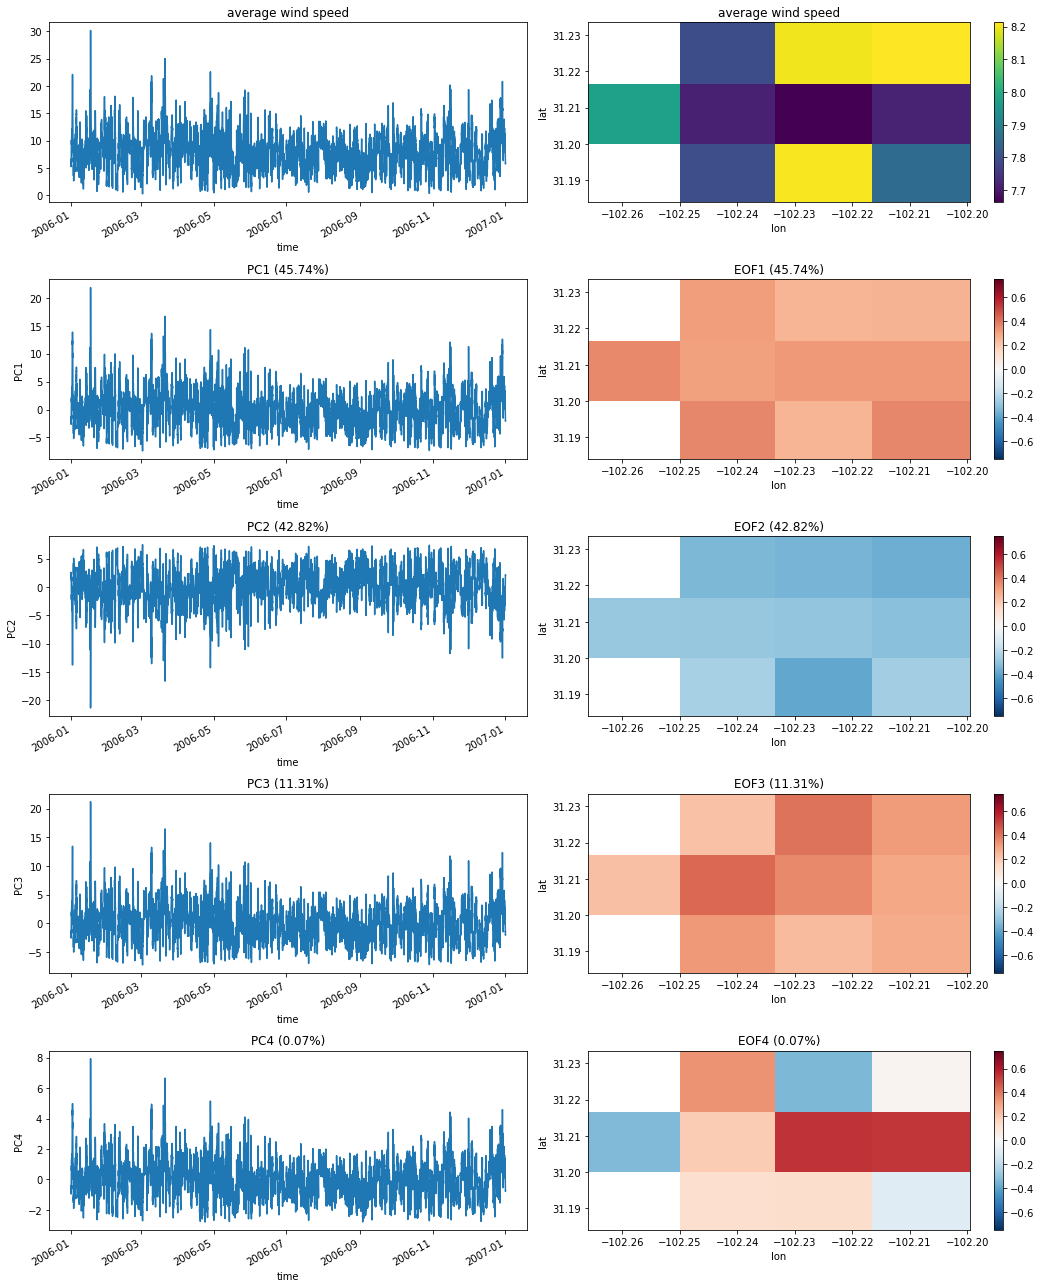

In [415]:
# plot
visualization(da, pcs, eofs_da, evfs)

Text(0.5, 1.03, 'Additive Decompose for TurbineID 1')

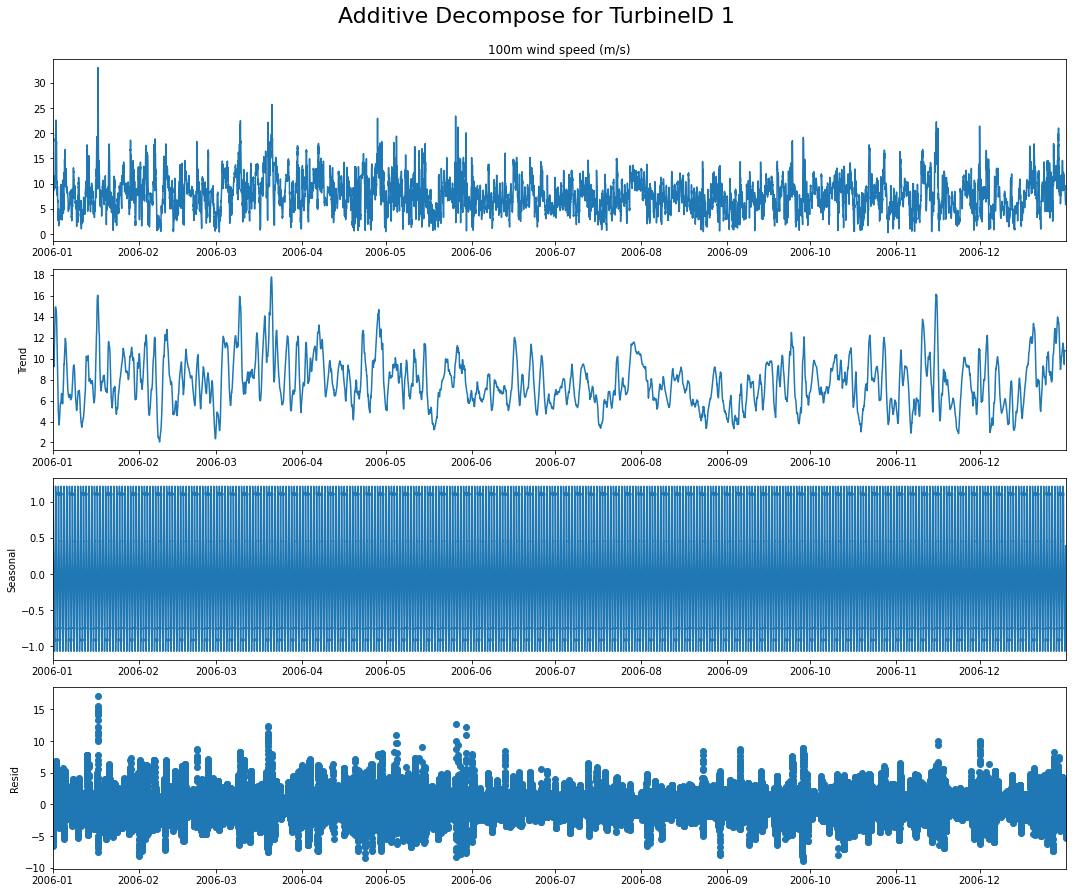

In [416]:
# Decomposing the time series for turbineID1
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from pylab import rcParams
rcParams['figure.figsize'] = 15, 12

# Additive Decomposition
result_add = seasonal_decompose(data1 ["100m wind speed (m/s)"], model='additive', extrapolate_trend='freq', period=6*24)
# Plot
result_add.plot().suptitle('Additive Decompose for TurbineID 1', fontsize=22,y=1.03)